In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.manifold import TSNE
from umap import UMAP

In [2]:
REBADD_LIB_PATH = os.path.abspath(os.pardir)
if REBADD_LIB_PATH not in sys.path:
    sys.path = [REBADD_LIB_PATH] + sys.path

from rebadd.chemutils import get_ecfp6

In [41]:
sns.set_theme(style='ticks')

In [4]:
def is_desired(s_bcl2, s_bclxl, s_bclw):
    is_succeed = True
    is_succeed &= (s_bcl2 > 9.069)
    is_succeed &= (s_bclxl > 8.283)
    is_succeed &= (s_bclw > 6.999)
    return is_succeed

In [13]:
## frag-level
input_dir_frag = os.path.join(os.pardir, 'TASK3', 'outputs_4_calculate_properties', 'zinc15')

frames_frag = []

for num in range(50,550,50):
    
    filename = f'smi_after.csv.{num:04d}'
    df = pd.read_csv(os.path.join(input_dir_frag, filename)).drop_duplicates(ignore_index=True)
    print(len(df))
    
    for i in range(len(df)):
        df.loc[i,"desired"] = is_desired(df.loc[i,"bcl2"], df.loc[i,"bclxl"], df.loc[i,"bclw"])
        df.loc[i,"fp"] = get_ecfp6(df.loc[i,"smiles"]).ToBitString()
    
    df.loc[:,"ckpt"] = f'frag-level ({num:04d})'
    
    frames_frag.append(df)

3755
742
290
325
337
246
202
152
135
164


In [15]:
## char-level
input_dir_char = os.path.join('outputs_4_calculate_properties', 'zinc15')

frames_char = []

for num in range(50,550,50):
    
    filename = f'smi_after.csv.{num:04d}'
    df = pd.read_csv(os.path.join(input_dir_char, filename)).drop_duplicates(ignore_index=True)
    print(len(df))
    
    for i in range(len(df)):
        df.loc[i,"desired"] = is_desired(df.loc[i,"bcl2"], df.loc[i,"bclxl"], df.loc[i,"bclw"])
        df.loc[i,"fp"] = get_ecfp6(df.loc[i,"smiles"]).ToBitString()
    
    df.loc[:,"ckpt"] = f'char-level ({num:04d})'
    
    frames_char.append(df)

603
386
262
697
841
831
918
898
945
961


In [19]:
fps = []

for df in frames_frag:
    fps.extend(df.loc[:,"fp"].values.tolist())
    
for df in frames_char:
    fps.extend(df.loc[:,"fp"].values.tolist())
    
fps = np.array([[*x] for x in fps], dtype=float)

In [22]:
transformer = UMAP(low_memory=False, random_state=2023, verbose=True).fit(fps)

UMAP(low_memory=False, random_state=2023, verbose=True)
Thu Dec  8 14:15:18 2022 Construct fuzzy simplicial set
Thu Dec  8 14:15:18 2022 Finding Nearest Neighbors
Thu Dec  8 14:15:18 2022 Building RP forest with 11 trees
Thu Dec  8 14:15:19 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	 7  /  14
	Stopping threshold met -- exiting after 7 iterations
Thu Dec  8 14:15:24 2022 Finished Nearest Neighbor Search
Thu Dec  8 14:15:26 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Thu Dec  8 14:15:33 2022 Finished embedding


In [23]:
for i, df in enumerate(frames_frag):
    df.loc[:,('X1','X2')] = transformer.transform([[*x] for x in df.loc[:,'fp'].values])

Thu Dec  8 14:19:33 2022 Worst tree score: 0.50891161
Thu Dec  8 14:19:33 2022 Mean tree score: 0.53661598
Thu Dec  8 14:19:33 2022 Best tree score: 0.55507670
Thu Dec  8 14:19:35 2022 Forward diversification reduced edges from 205350 to 51564
Thu Dec  8 14:19:36 2022 Reverse diversification reduced edges from 51564 to 51564


/home/descartes/anaconda3/envs/ReBADD_SE/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Thu Dec  8 14:19:37 2022 Degree pruning reduced edges from 54454 to 52278
Thu Dec  8 14:19:37 2022 Resorting data and graph based on tree order
Thu Dec  8 14:19:37 2022 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

In [24]:
for i, df in enumerate(frames_char):
    df.loc[:,('X1','X2')] = transformer.transform([[*x] for x in df.loc[:,'fp'].values])

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

Epochs completed:   0%|            0/100 [00:00]

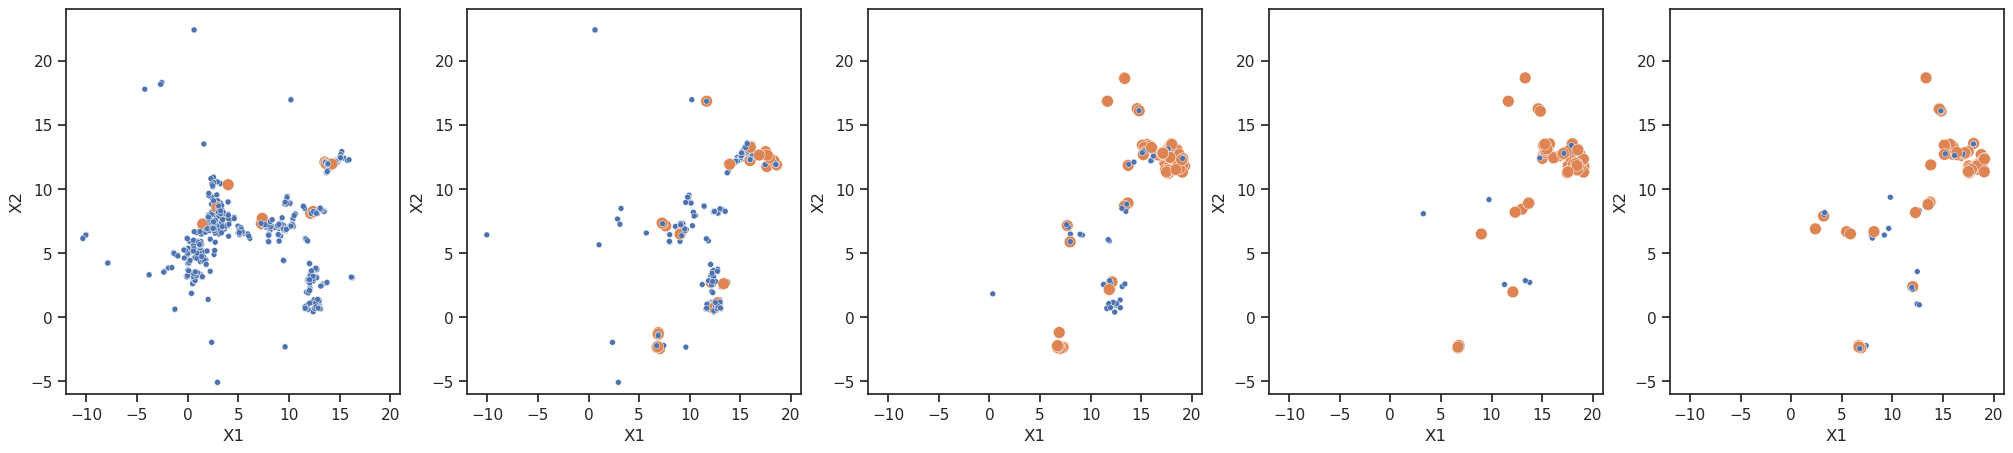

In [78]:
fig, ax = plt.subplots(1,5,figsize=(25,5))

for i, df in enumerate([df for j, df in enumerate(frames_frag) if j%2==1]):
    _ = sns.scatterplot(data=df, x='X1', y='X2', hue='desired', markers='desired',
                        size=[2 if x else 1 for x in df.loc[:,'desired'].values],
                        legend=False, ax=ax[i%5])
    
    ax[i%5].set_xlim(-12,21)
    ax[i%5].set_ylim(-6,24)

plt.show()

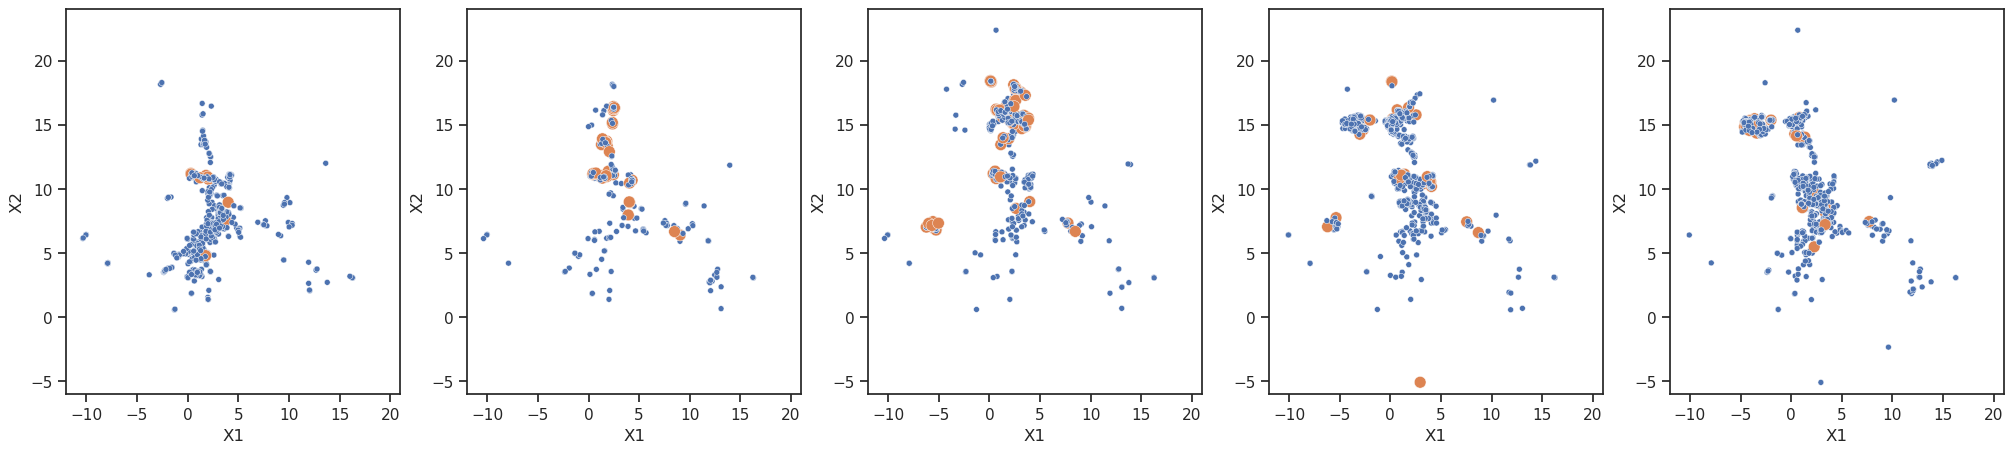

In [79]:
fig, ax = plt.subplots(1,5,figsize=(25,5))

for i, df in enumerate([df for j, df in enumerate(frames_char) if j%2==0]):
    _ = sns.scatterplot(data=df, x='X1', y='X2', hue='desired', markers='desired',
                        size=[2 if x else 1 for x in df.loc[:,'desired'].values],
                        legend=False, ax=ax[i%5])
    
    ax[i%5].set_xlim(-12,21)
    ax[i%5].set_ylim(-6,24)

plt.show()